# Cookbook: Every way to make a `Molecule`

Every pathway through the OpenFF Toolkit boils down to four steps:

1. Using other tools, assemble a graph of a molecule, including all of its atoms, bonds, bond orders, and stereochemistry[^rs]
2. Use that information to construct a [`Molecule`](openff.toolkit.topology.Molecule)
3. Combine a number of `Molecule` objects to construct a [`Topology`](openff.toolkit.topology.Topology)
4. Call [`ForceField.create_openmm_system(topology)`](openff.toolkit.typing.engines.smirnoff.forcefield.ForceField.create_openmm_system) to create an OpenMM [`System`](simtk.openmm.openmm.System) (or, in the near future, an OpenFF [`Interchange`](https://github.com/openforcefield/openff-interchange) for painless conversion to all sorts of MD formats)

So let's take a look at every way there is to construct a molecule! We'll use phenylalanine as an example biomolecule with all the tricky bits.

[^rs]: Note that this stereochemistry must be defined on the *graph* of the molecule. It's not good enough to just co-ordinates with the correct stereochemistry. But if you have the co-ordinates, you can try getting the stereochemistry automatically with `rdkit` or `openeye` --- If you dare!

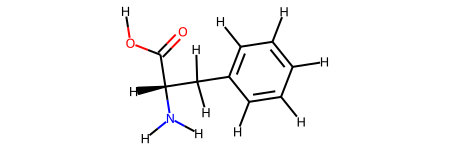

In [45]:
# Imports
from openff.toolkit.topology import Molecule, Topology
from openff.toolkit.typing.engines.smirnoff import ForceField
from rdkit.Chem import Draw

# Hide tracebacks for simpler errors
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    value.__cause__ = None  # suppress chained exceptions
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

# Show us phenylalanine
Molecule.from_smiles("N[C@@H](Cc1ccccc1)C(=O)O").visualize()

## From SMILES

SMILES is the classic way to create a `Molecule`. SMILES is a widely-used compact textual representation of arbitrary molecules. This lets us specify an exact molecule, including stereochemistry and bond orders, very easily --- though they may not be the most human-readable format.

### Implicit hydrogens SMILES

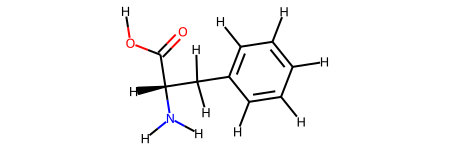

In [39]:
smiles_implicit_h = Molecule.from_smiles("N[C@@H](Cc1ccccc1)C(=O)O")
smiles_implicit_h.visualize()

### Explicit hydrogens SMILES

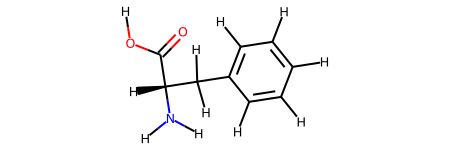

In [38]:
smiles_explicit_h = Molecule.from_smiles(
    '[H][O][C](=[O])[C@@]([H])([N]([H])[H])[C]([H])([H])[c]1[c]([H])[c]([H])[c]([H])[c]([H])[c]1[H]', 
    hydrogens_are_explicit=True
)
smiles_explicit_h.visualize()

### SMILES without stereochemistry

The Toolkit won't accept an ambiguous SMILES. This SMILES could be L- or D- phenylalanine; rather than guess, the Toolkit throws an error:

In [46]:
smiles_non_isomeric = Molecule.from_smiles(
    'NC(Cc1ccccc1)C(=O)O'
)

UndefinedStereochemistryError: Unable to make OFFMol from RDMol: Unable to make OFFMol from SMILES: RDMol has unspecified stereochemistry. Undefined chiral centers are:
 - Atom C (index 1)


## By hand

You can always construct a `Molecule` by building it up from individual atoms and bonds. This is usually not the best way to do it, but it's a useful fallback for when you need to write your own constructor for an unsupported source format.

- [x] “Molecules should have explicit hydrogens, bond orders, formal charges, stereochemistry (defined on GRAPH, not just 3D)”

- [ ] Molecule.add_atom and Molecule.add_bond

- [ ] from_file

- [ ] from_file_obj

- [ ] from_object, which really delegates to:

    from_rdkit

    from_openeye

- [x] from_smiles

- [ ] from_mapped_smiles

- [ ] from_qcschema

- [ ] offmol.remap (instance method)

- [ ] from_topology

- [ ] from_inchi – “InChI is not intended to be an interchange format” NOTE THAT THIS DOESN’T PRESERVE ATOM ORDER!!

- [ ] from_iupac (requires OpenEye)

- Things that go through Topology, and you actually need to know the GRAPH of the molecule ahead of time (they require a unique_molecules keyword argument with the full identity of the molecules to run). This really just reorders the atoms to be in the other object’s order:

    - [ ] Topology.from_openmm (add’l step mol=topology.reference_molecules[0])

    - [ ] Topology.from_mdtraj (add’l step mol=topology.reference_molecules[0])

- [ ] Molecule.from_pdb_and_smiles 

- [ ] Molecule.from_dict() (which underlies from_ bson, json, toml, messagepack, yaml, pickle, etc)